In [1]:
import matplotlib.pyplot as plt
import corner, os, glob, json
import numpy as np

In [2]:
#NEED TO CHANGE FILE ON DIFFERENT RUNS (ie full_run_1 -> full_run_2)
runname = '/full_run_3'
dataset = '/dataset_1b'

topdir = os.getcwd()
#Where the original data is
origdatadir = topdir + '/mdc2/group1' + dataset
#Where the json noise file is
noisefile = topdir + '/mdc2/group1/challenge1_psr_noise.json'
#Where the dataset files are located
datadir = topdir + dataset
#Where the everything should be saved to (chains, cornerplts, histograms, etc.)
outdir = datadir + runname
#param json file with index in chain
paramfile = outdir + '/Search_params.json'

In [3]:
#Load chains to make corner plots
chain = np.loadtxt(outdir + '/chain_1.txt')
burn = int(0.25 * chain.shape[0])

print(chain.shape)

(99900, 137)


In [4]:
#Load param files to iterate through pulsars in pta
with open(paramfile) as pf:
    param_dict = json.load(pf)
    pf.close()

In [5]:
#Which pulsar do we want to look at?
psrs = []
for psr in param_dict.keys():
    psrs.append(psr)

plot_psr = 'J1909-3744'
#plot_psr = psrs[-1]

print('Looking at pulsar ' + plot_psr)

psr_noise_names = []
psr_noise_idx = []

if plot_psr in param_dict:
    for psr, params in param_dict.items():
        if psr == plot_psr:
            for param_names, param_idx in params.items():
                psr_noise_names.append(param_names)
                psr_noise_idx.append(param_idx)
else:
    print('That pulsar is not in the pta.')

Looking at pulsar J1909-3744


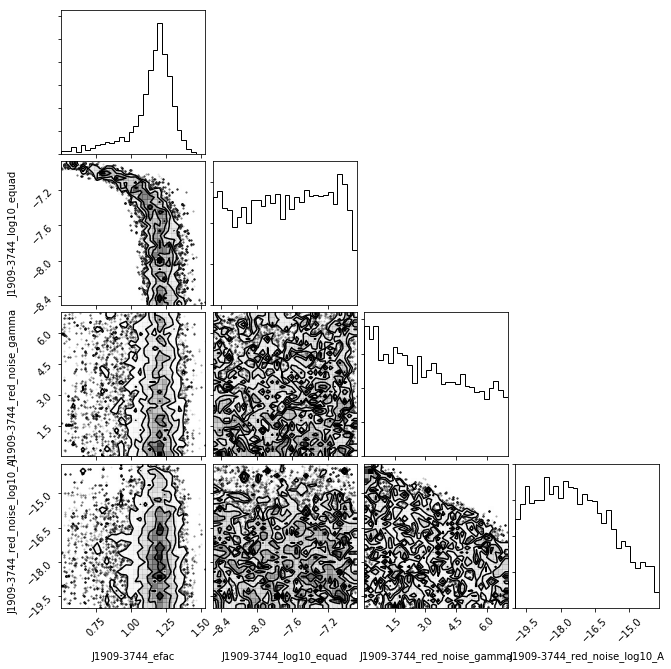

In [6]:
#pulsar corner plot
corner.corner(chain[burn:,psr_noise_idx], 30, labels=psr_noise_names);
plt.show()
#Plot and save corner plots
#plt.savefig(outdir + runname + '_cornerplt.png')
#plt.close()

-15.198628627427313


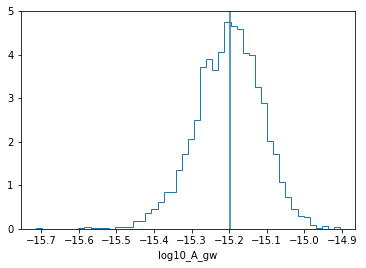

In [22]:
#Plot upperlimit histogram on gwb
index_from_eof = -5
pars = ['gamma_gw','log10_A_gw','Log Likelihood?','Log Likelihood?','acceptance rate','Something']

#Get median of GWB histogram
gwb_med = np.median(chain[burn:,index_from_eof])
print(gwb_med)

plt.hist(chain[burn:,index_from_eof], 50, density = True,histtype = 'step')
plt.axvline(x=gwb_med)
plt.xlabel(pars[index_from_eof])
plt.show()
#plt.close()